In [ ]:
# riss
# www.riss.kr

In [ ]:
from google.colab

In [1]:
path = '/content/drive/MyDrive/8장_data'

In [2]:
!pip install wordcloud

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob
import re # 정규표현식(regular expression)

from functools import reduce    #2차원 >> 1차원

from nltk.tokenize import word_tokenize          # word >> token
from nltk.corpus import stopwords                   # stopwords : 불용어
from nltk.stem import WordNetLemmatizer     #어간분석

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [4]:
import nltk

In [5]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)


True

데이터 준비

In [6]:
# 파일 병합

all_files = glob.glob(path + '/myCabinetExcelData*.xls')

In [7]:
all_files

['/content/drive/MyDrive/8장_data/myCabinetExcelData (1).xls',
 '/content/drive/MyDrive/8장_data/myCabinetExcelData (2).xls',
 '/content/drive/MyDrive/8장_data/myCabinetExcelData (3).xls',
 '/content/drive/MyDrive/8장_data/myCabinetExcelData (4).xls',
 '/content/drive/MyDrive/8장_data/myCabinetExcelData (5).xls',
 '/content/drive/MyDrive/8장_data/myCabinetExcelData (6).xls',
 '/content/drive/MyDrive/8장_data/myCabinetExcelData (7).xls',
 '/content/drive/MyDrive/8장_data/myCabinetExcelData (8).xls',
 '/content/drive/MyDrive/8장_data/myCabinetExcelData (9).xls',
 '/content/drive/MyDrive/8장_data/myCabinetExcelData.xls']

In [8]:
all_files_data = []
# 저장할 빈 리스트

for file in all_files:
  df = pd.read_excel(file)
  all_files_data.append(df)

all_files_data[0]
# 첫번째 파일 출력, 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
95,NaN,96,Smart city big data analytics: An advanced review,"Soomro, Kamran; Bhutta, Muhammad Nasir Mumtaz;...",John Wiley & Sons Ltd,2019
96,NaN,97,A watchdog approach - name-matching algorithm ...,"Kirubakaran, Anusuya; Aramudhan, M.",Inderscience,2018
97,NaN,98,An intelligent approach to Big Data analytics ...,"Verma, Neha; Singh, Jatinder",Emerald Group Publishing Limited,2017
98,NaN,99,How organisations leverage Big Data: a maturit...,"Comuzzi, Marco; Patel, Anit",Emerald Group Publishing Limited,2016


In [10]:
all_file = pd.concat(all_files_data, axis=0, ignore_index=True)

In [12]:
all_file.head(3)

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016


In [13]:
all_file.to_csv('/riss_bigdata.csv', encoding='utf-8', index=False)

데이터 전처리

In [14]:
# 제목 추출

all_file.head(3)

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016


In [16]:
all_title = all_file['제목']

In [17]:
all_title.head(3)

0    Guest Editorial: Big Media Data: Understanding...
1    Guest Editorial: Big Scholar Data Discovery an...
2      Guest Editorial: Big Data Analytics and the Web
Name: 제목, dtype: object

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
stopwords = set(stopwords.words('english'))

In [21]:
lemma = WordNetLemmatizer()

In [23]:
nltk.download('punkt') # 구두점(.?!)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [25]:
words = []

for title in all_title:
    enwords = re.sub(r'[^a-zA-Z]', " ", str(title))
    # 정규표현식 사용, 영문_소문자(a-zA-z) ^ 제외한 문자를 공백(" ") 변경
    enwordstoken = word_tokenize(enwords.lower())
    #소문자로 전부 변환 >> 변환 된 단어를 토큰화
    enwordsforuse= [w for w in enwordstoken if w not in stopwords]
    # 리스트 컴프리헨션(list comprehension) 사용, 불용어 제거한 단어
    enwordsforuse_lemma = [lemma.lemmatize(w) for w in enwordsforuse]
    # 어간 추출한 단어
    words.append(enwordsforuse_lemma)

In [26]:
print(words)

[['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part'], ['guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration'], ['guest', 'editorial', 'big', 'data', 'analytics', 'web'], ['parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data'], ['nosql', 'database', 'big', 'data'], ['computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow'], ['towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application'], ['new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean'], ['five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics'], ['towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud'], ['large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation'], ['hierarc

In [27]:
# 2차원 >> 1차원
word_list = reduce(lambda x, y : x+y, words)
print(word_list)

['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part', 'guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration', 'guest', 'editorial', 'big', 'data', 'analytics', 'web', 'parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data', 'nosql', 'database', 'big', 'data', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application', 'new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean', 'five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics', 'towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud', 'large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation', 'hierarchical', 'distributed', 

데이터 탐색(EDA)

In [30]:
# 빈도수 추출
count = Counter(word_list)

In [31]:
count.most_common(10)

[('data', 1645),
 ('big', 1354),
 ('analytics', 137),
 ('analysis', 67),
 ('based', 62),
 ('using', 57),
 ('system', 50),
 ('science', 50),
 ('management', 48),
 ('challenge', 47)]

In [34]:
word_count = dict()

for tag, counts in count.most_common(50):
    if (len(str(tag))> 1):
        word_count[tag] = counts
        print("%s : %d" %(tag, counts))

data : 1645
big : 1354
analytics : 137
analysis : 67
based : 62
using : 57
system : 50
science : 50
management : 48
challenge : 47
approach : 44
mining : 40
new : 38
research : 38
health : 37
model : 37
cloud : 34
smart : 34
learning : 33
opportunity : 31
processing : 30
technology : 28
small : 27
framework : 26
information : 26
computing : 25
application : 25
driven : 24
social : 24
issue : 24
quality : 23
network : 23
deal : 23
knowledge : 22
efficient : 22
review : 22
use : 22
era : 22
healthcare : 21
storage : 21
service : 21
perspective : 21
open : 20
platform : 19
survey : 19
making : 19
process : 19
distributed : 18
large : 18
environment : 18


In [35]:
# 검색어로 사용한 'big' , 'data' 토큰 제거

del word_count['big']
del word_count['data']

In [36]:
word_count

{'analytics': 137,
 'analysis': 67,
 'based': 62,
 'using': 57,
 'system': 50,
 'science': 50,
 'management': 48,
 'challenge': 47,
 'approach': 44,
 'mining': 40,
 'new': 38,
 'research': 38,
 'health': 37,
 'model': 37,
 'cloud': 34,
 'smart': 34,
 'learning': 33,
 'opportunity': 31,
 'processing': 30,
 'technology': 28,
 'small': 27,
 'framework': 26,
 'information': 26,
 'computing': 25,
 'application': 25,
 'driven': 24,
 'social': 24,
 'issue': 24,
 'quality': 23,
 'network': 23,
 'deal': 23,
 'knowledge': 22,
 'efficient': 22,
 'review': 22,
 'use': 22,
 'era': 22,
 'healthcare': 21,
 'storage': 21,
 'service': 21,
 'perspective': 21,
 'open': 20,
 'platform': 19,
 'survey': 19,
 'making': 19,
 'process': 19,
 'distributed': 18,
 'large': 18,
 'environment': 18}

데이터 시각화

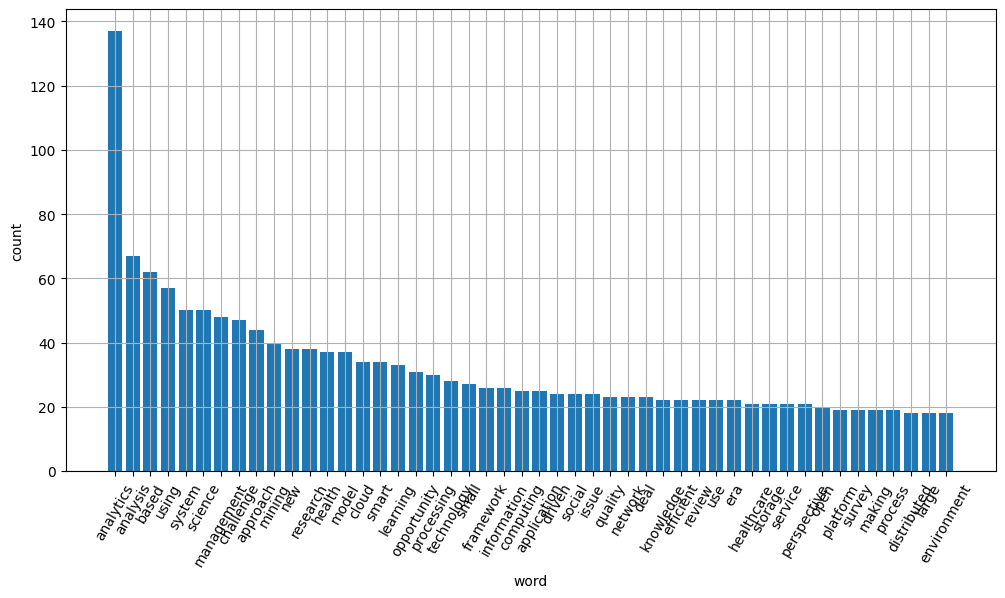

In [41]:
# 단어 빈도 히스토그램

plt.figure(figsize=(12,6))
plt.xlabel('word')
plt.ylabel('count')
plt.grid(True)

sorted_keys = sorted(word_count, key=word_count.get, reverse = True) # 내림차순 정렬
sorted_values = sorted(word_count.values(), reverse = True) # 내림차순 정렬

#print(sorted_keys)
#print(sorted_values)

plt.bar(range(len(word_count)), sorted_values, align='center') # 가운데 정렬
plt.xticks(range(len(word_count)), list(sorted_keys), rotation = 60)
plt.show()

분석 모델 구축 및 결과 시각화

In [42]:
# 연도별 데이터 수

# doc_count 새 열 생성
all_file.head(3)

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016


In [43]:
all_file['doc_count'] = 0

del all_file['Unnamed: 0']

In [44]:
all_file.head(3)

,번호,제목,저자,출판사,출판일,doc_count
0,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015,0
1,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016,0
2,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016,0


In [45]:
all_file.groupby('출판일')['doc_count'].count()

출판일
1994      1
1995      1
1996      1
1998      3
2002      4
2003      1
2004      3
2005      3
2007      2
2008      3
2009      2
2010      3
2011      8
2012     34
2013     87
2014    154
2015    114
2016    139
2017    158
2018    130
2019    106
2020     43
Name: doc_count, dtype: int64

In [46]:
all_file.groupby('출판일')['doc_count'].count().index

Index([1994, 1995, 1996, 1998, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype='int64', name='출판일')

In [50]:
all_file

,번호,제목,저자,출판사,출판일,doc_count
0,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015,0
1,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016,0
2,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016,0
3,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018,0
4,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017,0
...,...,...,...,...,...,...
995,96,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C.",unknown,2017,0
996,97,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017,0
997,98,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2016,0
998,99,Speed Up Big Data Analytics by Unveiling the S...,"Wang, J.; Zhang, X.; Yin, J.; Wang, R.; Wu, H....",unknown,2018,0


In [49]:
all_file.groupby('출판일', as_index=False)['doc_count'].count().index

RangeIndex(start=0, stop=22, step=1)

In [51]:
summary_year = all_file.groupby('출판일', as_index=False)['doc_count'].count()

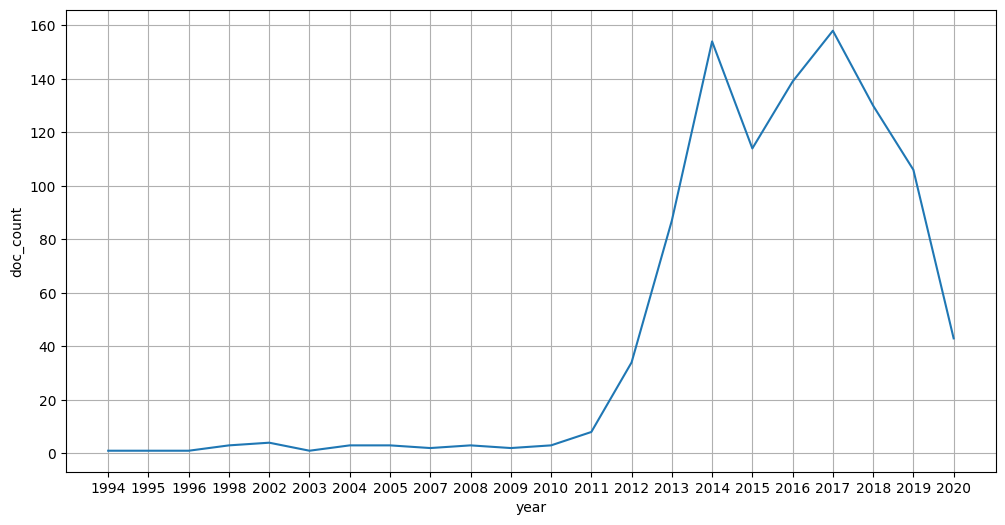

In [55]:
plt.figure(figsize=(12,6))
plt.xlabel('year')
plt.ylabel('doc_count')
plt.grid()

plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

워드 클라우드

In [58]:
stopwords = set(STOPWORDS)
print(stopwords)

{'such', 'by', 'the', "he'd", 'is', 'only', 'i', 'against', 'where', 'ourselves', "what's", 'a', 'should', 'theirs', 'him', 'those', 'more', "haven't", "i'm", 'your', 'and', "she's", "she'd", "couldn't", 'myself', 'shall', "aren't", 'same', 'after', 'yourself', 'about', 'at', 'below', 'www', 'was', 'themselves', 'each', "isn't", 'then', "you'll", "how's", 'why', 'there', 'also', 'our', "you're", "there's", 'yours', 'with', 'be', 'itself', "they're", 'am', 'further', 'into', 'ours', 'all', 'of', 'what', 'you', 'if', 'very', 'they', "weren't", "when's", "that's", 'which', "didn't", 'did', 'else', "mustn't", 'once', 'ought', "let's", "can't", 'few', 'off', 'here', 'because', 'being', 'yourselves', 'out', 'himself', "where's", 'down', 'hence', 'he', "i've", "wasn't", "don't", "she'll", 'could', 'during', 'get', 'both', 'has', "hadn't", 'on', 'ever', 'since', "you've", 'for', "they'll", 'how', 'k', 'nor', 'as', 'to', 'would', 'between', 'over', 'she', 'or', 'again', "doesn't", "they've", "w

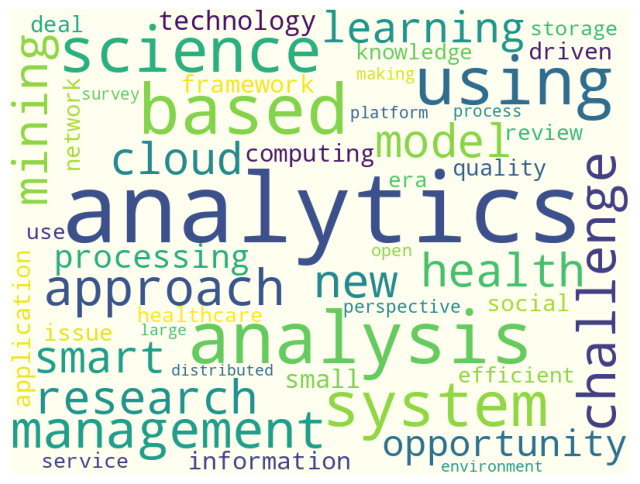

In [59]:
wc = WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [60]:
cloud.to_file('./riss_bigdata_wc.jpg')